# "Eigenfrequencies and Horizontal Wave Motion"

The goal of this project is to create an animation of a chain that connects four balls of the same mass along a spring, moving at each of its four different eigenfrequencies.  

This sounds very complicated at first, but the best way to solve a problem like this is to break it down into components. Let's start out with some equations.

To begin with, we have to realize that the function we are going to need for these waves are going to have to fit into a matrix of values. This is because the solution to this certain function is a differential equation that will produce a matrix when solved for and once we have that, we can produce the eigenfrequencies.

Eigenfrequences determine how fast the spring should be moving and for each mass, that part of the spring will have a certain eigenfrequency. 

We can call each of the masses displacement from the equilibirum position x0, x1, x2, and x3. Initially, they should all be equal to 0. With this in place, the potential energy of the system becomes:

$$U = \tfrac12 k x_0^2 + \tfrac12 k(x_1-x_0)^2 + \tfrac12 k(x_2-x_1)^2 + \tfrac12 k(x_3-x_2)^2 + \tfrac12 k x_3^2\,,$$

where k is the spring constant. For each term exlcuding the first and final, the position of the current x must be subtracted from the previous position x to make sure that the matrix value (and resulting eigenfrequency) will just be for that position and not a summation of the previous positions.

From the equation: $$F_i=-\frac{\partial U}{\partial x_i} = m\ddot{x_i}\,,$$

The four equations of motion for each mass will fall out from their respective partial derivatives. Once this is achieved, we can use to coefficients from the equations and put them into the matrix. This requires putting the 4 equations from before into the form of the solution:

$$\mathbf{Mx}=-\frac{\omega^2}{\omega_0^2}\mathbf{x}\,,$$

where $\mathbf{M}$ is the matrix with coefficients from the equations of motion and $\omega_0$ is the natural frequency of each spring. $omega_0^2$ are the eigenfrequencies that we are going to be solving for. This solution happens to be the solution for a simple harmonic oscilator. If we make $\omega_0 = 1$ and $\omega_0=\sqrt{k/m}$ the solution then becomes: 

$$\mathbf{Mx}=-\omega^2\mathbf{x}\,$$

Finally we have our equation for eigenfrequencies. It is important to note that the eigenfrequencies are going to be equal to the square root of the eigenvalues and that the solutions should all be real as opposed to imaginary. 

We'll start out with the coefficients from each of the four wave equations previously mentioned. Putting these in a matrix will allow for further calculations with the simple harmonic oscilator solution to eventually get the eigenfrequences. 

Imports needed for this project:

In [2]:
import numpy as np
import scipy.linalg as linalg #allows for math to be done with matrices
from matplotlib.animation import FuncAnimation #used for animation code
import matplotlib.pyplot as plt
from IPython import display

In [3]:
k = 1 #spring constant

M = np.array([[2*k, -k, 0, 0], #coefficients from equations
              [-k, 2*k, -k, 0],
              [0, -k, 2*k, -k],
              [0, 0, -k, 2]])

print(M)

[[ 2 -1  0  0]
 [-1  2 -1  0]
 [ 0 -1  2 -1]
 [ 0  0 -1  2]]


These eigenvalues can now be used to get the eigenfrequencies and then the corresponding eigenvectors. The eigenvectors are simply the eigenfrequency values for the matrix above. The eigenfrequencies are named according to their intial x position and the eigenvectors correspond to this as well. 

In [1]:
eigenvalues, eigenvectors = linalg.eigh(M) #passes the matrix through for solving

eigenvalues = np.sort(np.sqrt(eigenvalues)) #solves for values

eigfreq1 = eigenvalues[0]
eigfreq2 = eigenvalues[1]
eigfreq3 = eigenvalues[2]
eigfreq4 = eigenvalues[3]

eigvec1 = eigenvectors[:,0] #array formatting 
eigvec2 = eigenvectors[:,1]
eigvec3 = eigenvectors[:,2]
eigvec4 = eigenvectors[:,3]

print("eigenvalue 1:", eigfreq1.round(5), " eigenvector 1:", eigvec1)
print("eigenvalue 2:", eigfreq2.round(5), " eigenvector 2:", eigvec2)
print("eigenvalue 3:", eigfreq4.round(5), " eigenvector 3:", eigvec3)
print("eigenvalue 4:", eigfreq4.round(5), " eigenvector 4:", eigvec4)


NameError: name 'linalg' is not defined

With this result, we can now create the animation. 

Time time dependent solution to a simple harmonic oscilator is given as:

$$x_i(t) = A_i\sin(\omega t + \phi)\,,$$

If we consider for a moment what a simple harmonics oscilator means for this project, we can dedude that since there are four different equations for the potential energy of the masses there will be four different wave equations because the phases and amplitudes are all different. 

However, because the entire system is being driven by an eigenfrequency, the ampitudes of the 4 mass' movements are exactly equal to the eigenvector since they have been normalized. Because of this, the phase will always be either 0 or $\pi$ because of this so the phase does not affect the function enough to change.  

The following plot of the spring and its resulting animation is the final result:

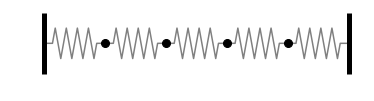

In [6]:
def draw_spring(xi, xf):
    """
    Draws a horizontal spring.
    Inputs: xi = inital x-coordinate
            xf = final x-coordinate
    """
    dy = 0.5
    x = np.linspace(xi, xf, 23)
    y = np.array([0]*4 + [dy, 0, -dy, 0]*4 + [0]*3)
    spring = plt.Line2D(x, y, linestyle="-", color = "gray", zorder = -1)
    ax = plt.gca()                      #                        ^
    ax.add_line(spring)                 # draw behind everything else


def draw_chain(x_offsets):
    """
    Draw a chain of five springs and four masses.
            x_offsets = Sequence of displacements from equilibrium position.
    """
    x = np.arange(2, 10, 2) + x_offsets
    
    # draw springs
    draw_spring(0, x[0],)
    draw_spring(x[0], x[1])
    draw_spring(x[1], x[2])
    draw_spring(x[2], x[3])
    draw_spring(x[3], 10)
    
    # draw masses
    plt.plot(x, [0, 0, 0, 0], "ko", ms = 8)
    
    # draw verycial edges
    plt.vlines([0, 10], -1, 1, "k", lw = 5)
    
# example of an unstretched chain
draw_chain([0, 0, 0, 0])
plt.axis("scaled")
plt.axis("off")
plt.show()

In [8]:
fig = plt.figure(figsize= (8, 8))

def animate(frame):
    
    fig.clear()

    B = .1 #slows down animation
    
    x0 = eigvec1*np.sin(B*eigfreq1*frame)
    x1 = eigvec2*np.sin(B*eigfreq2*frame)
    x2 = eigvec3*np.sin(B*eigfreq3*frame)
    x3 = eigvec4*np.sin(B*eigfreq4*frame)
    
    #use subplots to plot 4 chains
    plt.subplot(4,1,1)
    draw_chain(x0)
    plt.axis("off")

    plt.subplot(4,1,2)
    draw_chain(x1)
    plt.axis("off")
    
    plt.subplot(4,1,3)
    draw_chain(x2)
    plt.axis("off")
    
    plt.subplot(4,1,4)
    draw_chain(x3)
    plt.axis("off")

anim = FuncAnimation(fig, animate, frames = 200, interval = 20)
video = anim.to_html5_video()
plt.close()
display.HTML(video)


# To Summarize:

We were able to take four partial differential equations of the potential energy function for four spring masses and use their eigenvalues to find the resulting eigenfrequencies. From this, the eigenfrequencies were used to get the resulting eigenvectors which were then used to animate the motion of the system with different frequencies. 


Projects like this are especially fascinating because one could add in as many masses as one wanted as long as the matrix and resulting eigenfrequencies are correct. The physics behind this fundamental concept is combined here as well. 